# .

In [1]:
# this code enables the automated feedback. If you remove this, you won't get any feedback
# so don't delete this cell!
try:
  import AutoFeedback
except (ModuleNotFoundError, ImportError):
  !pip install git+https://github.com/abrown41/AutoFeedback@notebook
  import AutoFeedback

try:
  from testsrc import test_main
except (ModuleNotFoundError, ImportError):
  # !pip install "git+https://github.com/autofeedback-exercises/exercises.git@testpip#subdirectory=MTH1025/plot_labs/dfdx"
  from testsrc import test_main
 
def runtest(tlist):
  import unittest
  from contextlib import redirect_stderr
  from os import devnull
  with redirect_stderr(open(devnull, 'w')):
    suite = unittest.TestSuite()
    for tname in tlist:
      suite.addTest(eval(f"test_main.UnitTests.{tname}"))
    runner = unittest.TextTestRunner()
    try:
      runner.run(suite)
    except (AssertionError, ImportError):
      pass


# Numerical Differentiation 

Consider the function:

$$f(x) = \exp(-x^2)$$

To differentiate such a function you can use the rules of calculus. This approach is known as the 'analytical' approach and it will give you an exact answer. But computers don't know how to do calculus, so we have to use different methods (which we call 'numerical' methods) to differentiate functions. These approaches will give us answers that are approximate, and exploring the accuracy of the approach is part of the goal of this set of exercises.

---

## Tasks 1
We will start by setting up the function we wish to differentiate and plotting the derivative to see what we're aiming for.

1. Define a variable `delx` with the value 0.1
2. Set up an array `x` with values between -10 and 10 separated by `delx` (ensure the first and last values in the array are -10 and 10)
3. Set up an array `f` which contains the values of the function (defined above) evaluated for each value in the array `x`.
4. Differentiate the function $f(x)$  (by hand) and set up an array containing value of the derivative at each value in the array `x`. Call this new array `exact_derivative`.
6. Plot `exact_derivative` as a function of `x` in a solid black line. Create a legend and label the line 'Exact Derivative' therein. Label the axes 'x' and 'df/dx' (without quotes).



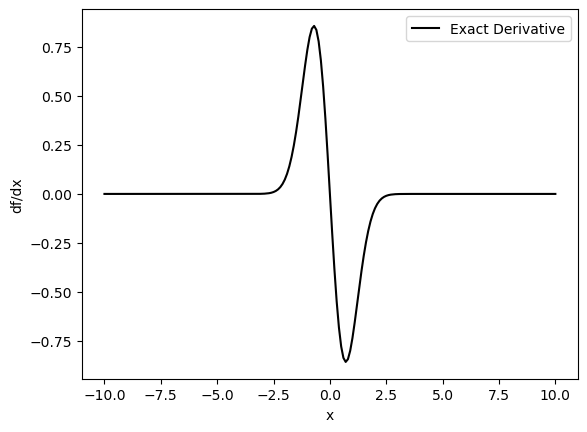

In [3]:
# your code goes here
import numpy as np
import matplotlib.pyplot as plt

delx=0.1
x=np.arange(-10,10.1,0.1)
f=np.exp(-x**2)
exact_derivative=f*(-2*x)
plt.plot(x,exact_derivative,'k-',label='Exact Derivative')
plt.legend()
plt.xlabel('x')
plt.ylabel('df/dx')





# this command is for the Automated Feedback: don't delete it!
fighand = plt.gca()

In [4]:
runtest(["test_step1", "test_step2", "test_step3", "test_step4", "test_step5"])

Variable delx is correct!              


Variable x is correct!              


Variable f is correct!              


Variable exact_derivative is correct!              


Dataset Exact Derivative plotted correctly!


Plot is correct!




## Tasks 2
We're now going to calculate the derivative numerically. This means that instead of using calculus to differentiate our function (as you did in tasks 1), we will get the computer to approximate the derivative for us, using the Taylor expansion.

To do this, consider a generic function $f(x)$ . Now consider a small value $\Delta x$. It's useful to think of $\Delta x$ as the spacing between grid points like so:

<center><img src='https://raw.githubusercontent.com/autofeedback-exercises/exercises/testpip/MTH1025/plot_labs/dfdx/grid.png' height=150 /></center>

Write down the Taylor expansion for $f(x)$ up to first order. Now rearrange your expression to make $\frac{df}{dx}$ the subject. Your equation should look like this:

$$ \dfrac{df}{dx} = \dfrac{f(x+\Delta x) - f(x)}{\Delta x} $$

Hopefully that looks familiar (think of the limit definition of the derivative of a function)

To use this equation remember that a function like $f(x)$ will in fact be a list of numbers in python. Thus if I define an array of values for $x$ with some spacing $\Delta x$, I get a vector `x` in python. Similarly then, if I evaluate my function for each value of $x$ in my vector `x` then I will get a corresponding vector `f` like so:

<center><img src='https://raw.githubusercontent.com/autofeedback-exercises/exercises/testpip/MTH1025/plot_labs/dfdx/gridnum.png' height=150 /></center>

Now let's pick a specific value of $x$ on this grid, say the value contained in the element `x[99]`. Can you identify where in this picture $f(x)$ will be? Can you identify where the value of $f(x+\Delta x)$ will be?

If you have followed the reasoning up to this point, hopefully you will be able to see that the value of the derivative at the point `x[99]` can be written as
```python
(f[100] - f[99]) / delx
```
where the variable `delx` is the spacing $\Delta x$ that we defined in the first set of tasks.

1. Define a variable `df99` and assign it the value of the derivative at `x[99]` given by the formula above
2. you also know the exact value of the derivative at `x[99]`: it is one of the elements in the array `exact_derivative`. Calculate the error in your approximation by taking the absolute value of the difference between the exact value and your approximate value, `df99`. Store this value in the variable `err99`


In [9]:

# your code goes here
df99=(f[100]-f[99])/delx
err99=np.absolute(exact_derivative[99]-df99)





In [10]:
runtest(["test_step6", "test_step7"])

Variable df99 is correct!              


Variable err99 is correct!              




## Tasks 3
Now that we've been able to calculate the derivative at a single point, we should be able to generalise and calculate the derivative at every point. But we have to be careful: the formula doesn't work at the last (rightmost) value of $x$ in our array. Can you see why?

Define a function `numerical_derivative` which takes as its input arguments an array `f` and the grid spacing `delx`. Within this function

1. Set the number of 'grid points' `N`: this is just the length of (number of elements in) the array `f`. You can use the built in command `len(f)` to determine `N`.
2. Set up an array `dfdx` of length `N`. The vector should be all zeros (you can use the command `np.zeros(N)` for this.)
3. Set up a loop which iterates a variable `ii` over the values `0, 1, 2, ...N-2` (this cuts off the last point)
4. Use the general form of the formula above to determine the derivative at point `x[ii]` and store it in `dfdx[ii]`
5. Because the derivative at the last point is not set by this procedure we have to give it a sensible value. A good choice is to make it equal to the value at the last-but-one point. Can you see why this would be? To do this, use the command
```python
dfdx[-1] = dfdx[-2]
```
remembering that the element `[-1]` is the last element, `[-2]` is the last-but-one etc.

Your function should return the array `dfdx`.

In [11]:
def numerical_derivative(f,delx):
  N=len(f)
  dfdx=np.zeros(N)
  for ii in range(N-1):
    dfdx[ii]=(f[ii+1]-f[ii])/delx
    dfdx[-1]=dfdx[-2]
  return dfdx

In [12]:
runtest(["test_step8"])

Function, numerical_derivative is correct!              




## Tasks 4
Equipped with the function `numerical_derivative` we can now compute and plot some approximations to the derivative of our function $f(x)$, and see how accurate it is.

1. Plot the exact derivative again, following the instructions from task 1 (you can just copy and paste your code)
1. Using the array `f` and the value `delx=0.1` (defined in the first task), calculate $\frac{df}{dx}$ using the function `numerical_derivative` and plot it as a function of $x$ alongside your exact derivative. Plot it in red, and add the legend label 'Numerical Derivative, delx=0.1'.
2. For comparison, compute a new array `x2` between -10 and 10 with spacing 0.5. Using this compute a new array `f2` containing the value of the function at those $x$ values.
3. Using the array `f2` and the value for the spacing, `delx=0.5` calculate $\frac{df}{dx}$ using the function `numerical_derivative` and plot it as a function of $x$ alongside your other derivatives. Plot it in blue, and add the legend label 'Numerical Derivative, delx=0.5'.


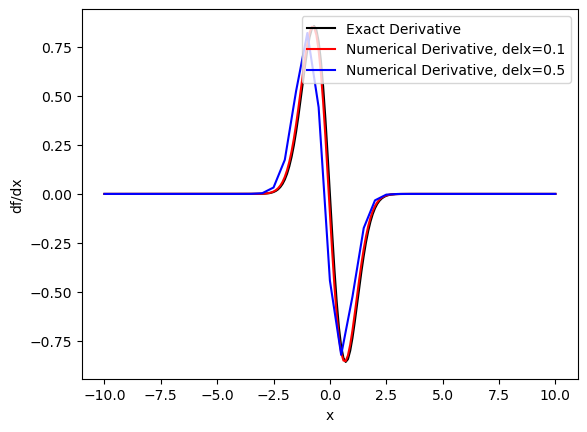

In [16]:
delx=0.1
x=np.arange(-10,10.1,0.1)
f=np.exp(-x**2)
exact_derivative=f*(-2*x)
plt.plot(x,exact_derivative,'k-',label='Exact Derivative')
plt.legend()
plt.xlabel('x')
plt.ylabel('df/dx')

dfdx=numerical_derivative(f,delx)
plt.plot(x,dfdx,'r',label='Numerical Derivative, delx=0.1')
x2=np.arange(-10,10.5,0.5)

f2=np.exp(-x2**2)

dfdx=numerical_derivative(f2,0.5)
plt.plot(x2,dfdx,'b',label='Numerical Derivative, delx=0.5')
plt.legend()


# This line is needed for the Automated Feedback: don't delete it
fighand = plt.gca()


In [17]:
runtest(["test_plot"])

Dataset Exact Derivative plotted correctly!


Dataset Numerical Derivative, delx=0.1 plotted correctly!


Dataset Numerical Derivative, delx=0.5 plotted correctly!


Plot is correct!


